In [6]:
# INST414 Module 2: Social Media & Mental Health
import networkx as nx
import pandas as pd
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt

In [2]:
file_path = r"C:\Users\MegaN\Downloads\XXH2023_YRBS_Data.dat"  # Use raw string

# ✅ Read data safely
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# ✅ Skip header if necessary
if lines[0].startswith("source"):  # Adjust based on your file's header
    lines = lines[1:]

# ✅ Process data into edges
edges = []
for line in lines:
    parts = line.strip().split()  # Change to split(',') if CSV, split('\t') if tab-separated

    if len(parts) == 3:
        try:
            source, target, weight = parts
            edges.append((source, target, float(weight)))  # Convert weight to float
        except ValueError:
            print(f"Skipping invalid row: {line}")

In [3]:
G = nx.Graph()
G.add_weighted_edges_from(edges)

In [4]:
centrality = nx.degree_centrality(G)
print("Node Centrality:", centrality)

Node Centrality: {}


Nodes: []
Edges: []


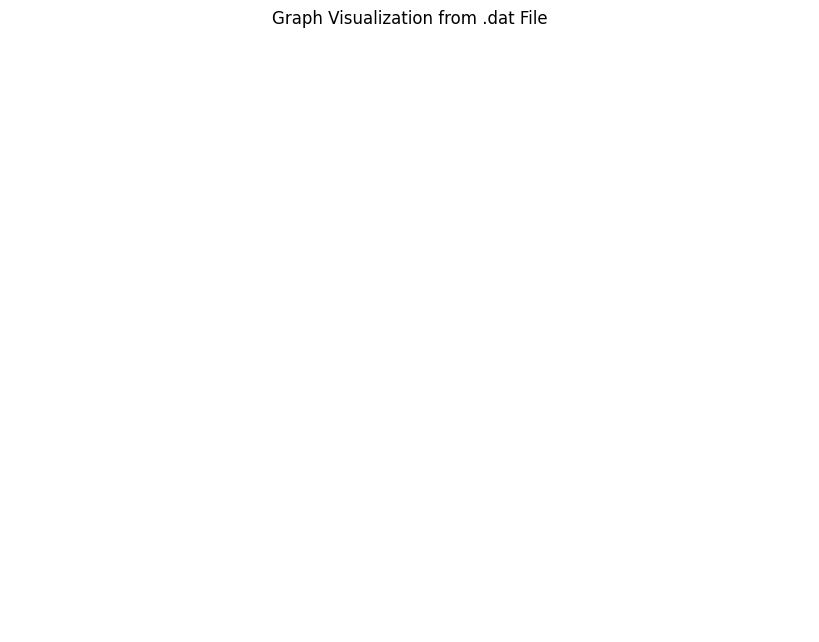

In [8]:
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)

# ✅ Debugging: Print node and edge labels
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges(data=True)))

edge_labels = {(e[0], e[1]): e[2]['weight'] for e in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph Visualization from .dat File")
plt.show()